In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

/tmp/ipykernel_401228/2769132933.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


# Introduction 
Time-series forecasting models are the models that are capable to predict future values based on previously observed values. Time-series forecasting is widely used for non-stationary data. Non-stationary data are called the data whose statistical properties e.g. the mean and standard deviation are not constant over time but instead, these metrics vary over time.<br>

These non-stationary input data (used as input to these models) are usually called time-series. Some examples of time-series include the temperature values over time, stock price over time, price of a house over time etc. So, the input is a signal (time-series) that is defined by observations taken sequentially in time.

# The AutoRegressive Integrated Moving Average (ARIMA) model
A famous and widely used forecasting method for time-series prediction is the AutoRegressive Integrated Moving Average (ARIMA) model. ARIMA models are capable of capturing a suite of different standard temporal structures in time-series data.<br>

- AR: < Auto Regressive > means that the model uses the dependent relationship between an observation and some predefined number of lagged observations (also known as “time lag” or “lag”).
- I:< Integrated > means that the model employs differencing of raw observations (e.g. it subtracts an observation from an observation at the previous time step) in order to make the time-series stationary.MA:
- MA: < Moving Average > means that the model exploits the relationship between the residual error and the observations.

## Model parameters
- p is the number of lag observations.
- d is the degree of differencing.
- q is the size/width of the moving average window.

In [2]:
df = pd.read_csv("TSLA.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


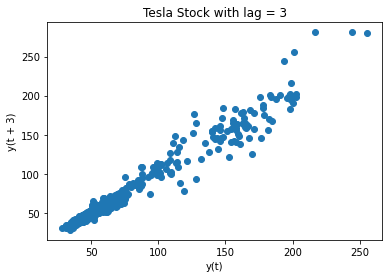

In [3]:
plt.figure()
lag_plot(df["Open"], lag=3)
plt.title("Tesla Stock with lag = 3")
plt.show()

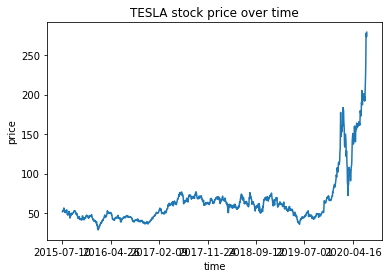

In [4]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,1259, 200), df['Date'][0:1259:200])
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

Next, let’s divide the data into a training (70 % ) and test (30%) set. For this tutorial we select the following ARIMA parameters: p=4, d=1 and q=0.

In [8]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]

training_data = train_data['Close'].values
test_data = test_data['Close'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 29.70234943600779


## Summary of the code
- We split the training dataset into train and test sets and we use the train set to fit the model, and generate a prediction for each element on the test set.
- A rolling forecasting procedure is required given the dependence on observations in prior time steps for differencing and the AR model. To this end, we re-create the ARIMA model after each new observation is received.
- Finally, we manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended at each iteration.

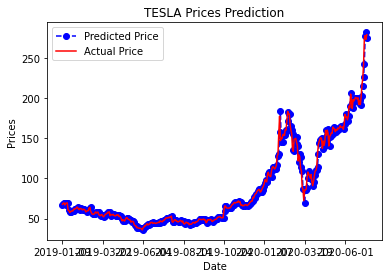

In [9]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()